**Proyek: Analisis Data Cuaca (penerapan two visualization Quantitative menggunakan relplot())**

**Tujuan:**

**Gunakan dataset cuaca untuk mengeksplorasi hubungan(korelasi) antara suhu, kelembapan, dan kecepatan angin.**

---

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muthuj7/weather-dataset")

print("Path to dataset files:", path)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\muthuj7\weather-dataset\versions\1


In [3]:
import os

# 'path' adalah variabel yang sama dari kode kagglehub Anda
# Kode ini akan membuat daftar semua file yang ada di dalam FOLDER 'path'
try:
    file_list = os.listdir(path)
    print("File di dalam folder dataset:")
    print(file_list)
except Exception as e:
    print("Terjadi error:", e)
    print("\nPastikan variabel 'path' Anda sudah benar dari langkah sebelumnya.")

File di dalam folder dataset:
['weatherHistory.csv']


In [4]:
import pandas as pd
import os


# --- Pengaturan Tampilan Pandas ---
# Menjalankan ini sekali akan membuat semua output tabel lebih rapi

# Perintah untuk menampilkan semua kolom (tidak ada yang disembunyikan dengan '...')
pd.set_option('display.max_columns', None)

# Perintah untuk memperlebar tampilan output agar tidak terpotong ke bawah
pd.set_option('display.width', 1000)

-----

In [5]:
# display dataset
# Variabel 'path' adalah lokasi folder dari kode kagglehub
# Kita gabungkan path folder dengan nama file untuk mendapatkan lokasi file yang lengkap
file_path = os.path.join(path, 'weatherHistory.csv')

# Sekarang kita baca file CSV itu menggunakan Pandas
try:
    weather_df = pd.read_csv(file_path)
    
    # Mari kita tampilkan 5 baris pertama dari data kita untuk memastikan semuanya berhasil
    print("Selamat! Data berhasil dimuat. Ini 5 baris pertamanya:")
    print('=' * 50)
    print(weather_df.head())
    
except FileNotFoundError:
    print("Error: File tidak ditemukan. Pastikan nama file  sudah benar.")
except Exception as e:
    print("Terjadi error lain:", e)

print('=' * 50)

# 2. periksa missing values
missing_values = weather_df.isna().sum()
print(f"Total missing values setiap kolom\n{missing_values}")

Selamat! Data berhasil dimuat. Ini 5 baris pertamanya:
                  Formatted Date        Summary Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)                      Daily Summary
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222                  7.388889      0.89            14.1197                   251.0          15.8263         0.0               1015.13  Partly cloudy throughout the day.
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556                  7.227778      0.86            14.2646                   259.0          15.8263         0.0               1015.63  Partly cloudy throughout the day.
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778                  9.377778      0.89             3.9284                   204.0          14.9569         0.0               1015.94  Partly clou

In [8]:
# 1. Ambil kolom yang dibutuhkan 
df = weather_df[['Formatted Date', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]

# 2. Ganti nama kolom 
df = df.rename(columns={
    'Formatted Date': 'date',
    'Temperature (C)': 'temperature_celsius',
    'Humidity': 'humidity_percent',
    'Wind Speed (km/h)': 'wind_speed_kmh'
})

# 3. Konversi humidity jadi persen (%)
df['humidity_percent'] = df['humidity_percent'] * 100


# 4. Pastikan kolom date dalam format datetime
df['date'] = pd.to_datetime(df['date'], utc=True)

# 5. Buat kolom season dari bulan
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['date'].dt.month.apply(month_to_season)

df.head()


,date,temperature_celsius,humidity_percent,wind_speed_kmh,season
0,2006-03-31 22:00:00+00:00,9.472222,89.0,14.1197,Spring
1,2006-03-31 23:00:00+00:00,9.355556,86.0,14.2646,Spring
2,2006-04-01 00:00:00+00:00,9.377778,89.0,3.9284,Spring
3,2006-04-01 01:00:00+00:00,8.288889,83.0,14.1036,Spring
4,2006-04-01 02:00:00+00:00,8.755556,83.0,11.0446,Spring


---

## EDA

---

**1. Hubungan Suhu dan Kelembapan:**

- Buat scatter plot untuk melihat hubungan antara temperature_celsius dan humidity_percent.
- Gunakan parameter hue untuk membedakan data berdasarkan season. Apakah Anda melihat pola yang berbeda untuk setiap musim?

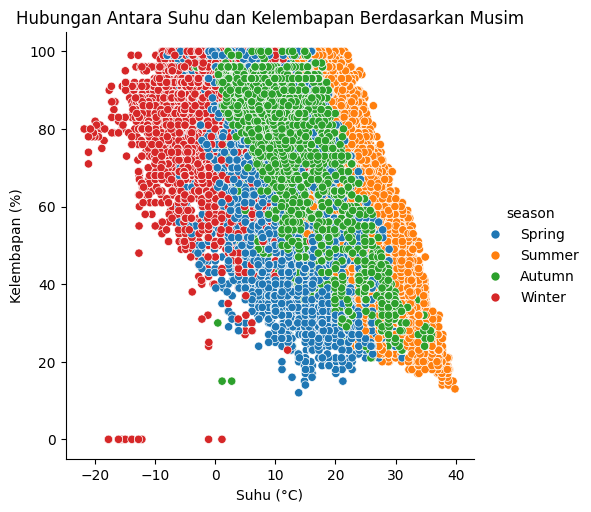

-0.63


In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.relplot(x="temperature_celsius",              
            y="humidity_percent",
            hue='season',              
            data=df,             
            kind="scatter")

plt.title('Hubungan Antara Suhu dan Kelembapan Berdasarkan Musim')
plt.xlabel('Suhu (°C)')
plt.ylabel('Kelembapan (%)')
plt.show()


print(df['temperature_celsius'].corr(df['humidity_percent']).round(2))

**hubungan antar keduanya negatif mendekati 0 tentu saja ketika temperature naik kelembaban cenderung menurun begitupun sebaliknya**
**ketika musim dingin temperature cenderung turun sementara kelembapan cenderung naik. dalam hal ini season sangat perpengaruh dalam perubahan temperature dan kelembapan**

---

**2. Tren Suhu Harian (Simulasi):**
 - Karena kita tidak punya data per jam, mari kita asumsikan date adalah data berurutan. Buat line plot untuk melihat tren temperature_celsius dari waktu ke waktu (menggunakan date di sumbu x).

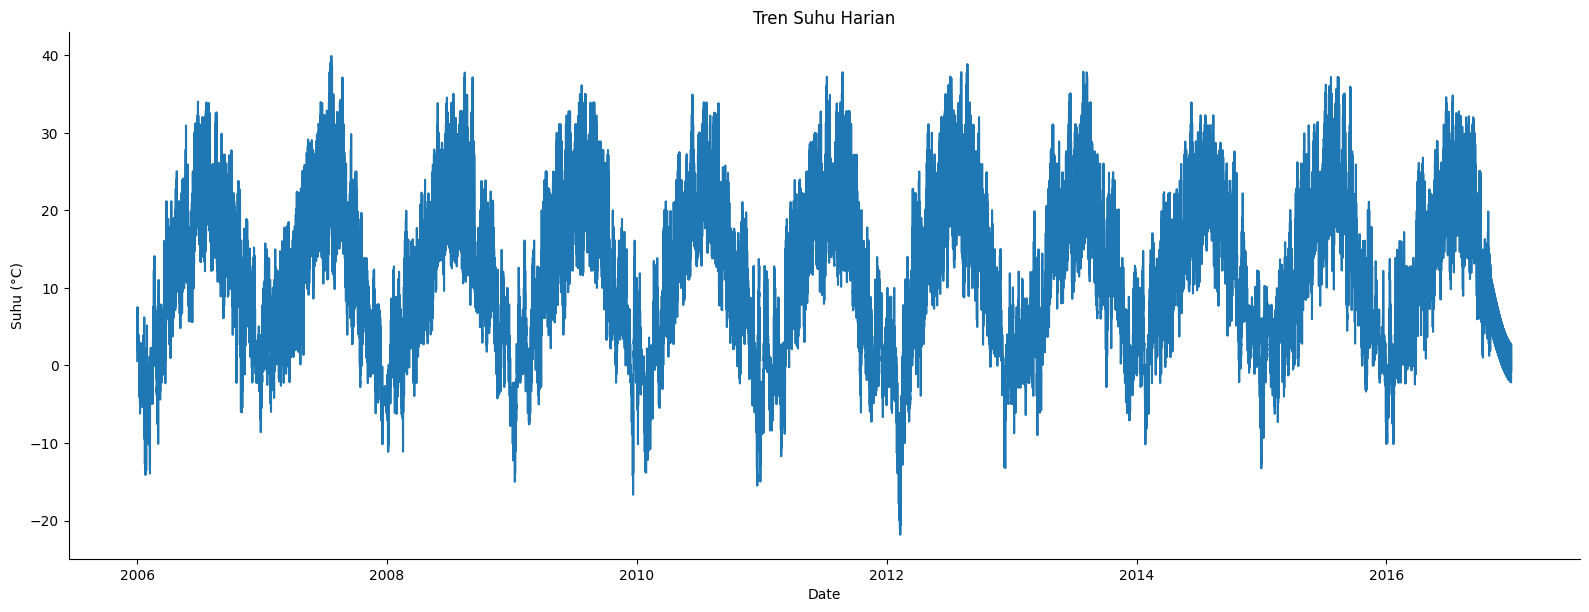

In [29]:
sns.relplot(x='date', 
            y='temperature_celsius', 
            data=df, 
            kind='line',
            height=6,
            aspect=16/6)
plt.title('Tren Suhu Harian')
plt.xlabel('Date')
plt.ylabel('Suhu (°C)')
plt.show()


**tren naik turun seperti pada umumnya**

---

**3. Analisis Subplot Kecepatan Angin:**
- Buat kembali scatter plot dari Tugas 1 (temperature_celsius vs humidity_percent).
- Sekarang, gunakan relplot() untuk membuat subplot berdasarkan season menggunakan parameter col. Atur col_wrap=2 agar plot ditampilkan dalam format 2x2.
- Pada plot yang sama, gunakan parameter size untuk merepresentasikan wind_speed_kmh.

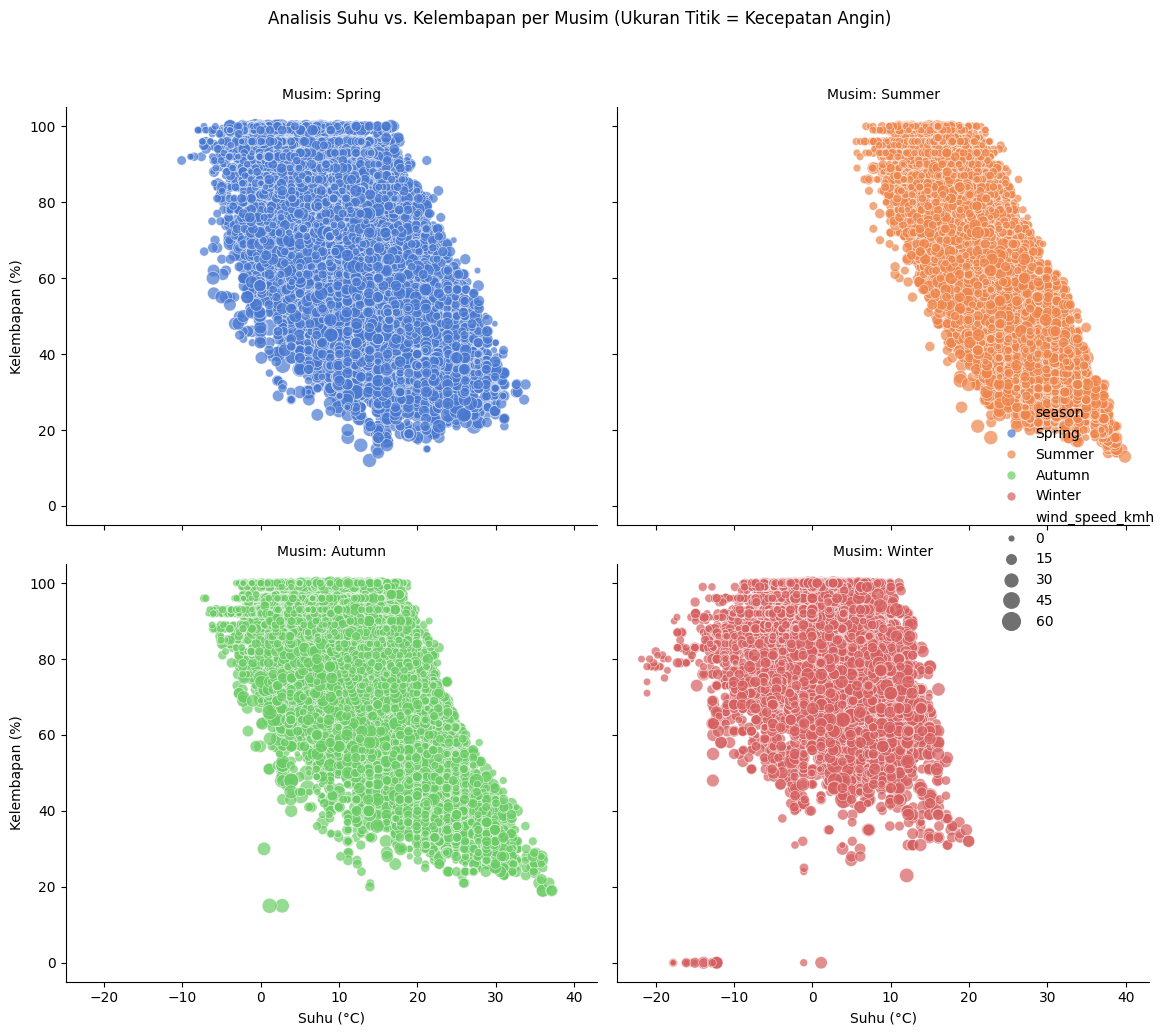

In [32]:
# Menggunakan relplot dan menyimpan objeknya ke variabel 'g'
g = sns.relplot(
    data=df,
    x='temperature_celsius',
    y='humidity_percent',
    hue='season',
    col='season',          # Subplot berdasarkan musim
    size='wind_speed_kmh', # Ukuran titik berdasarkan kecepatan angin
    col_wrap=2,            # Membungkus subplot agar menjadi 2x2
    kind='scatter',
    palette='muted',
    sizes=(20, 200),       # Rentang ukuran titik
    alpha=0.7
)

# Menambahkan judul utama (suptitle) untuk keseluruhan gambar
g.fig.suptitle('Analisis Suhu vs. Kelembapan per Musim (Ukuran Titik = Kecepatan Angin)', y=1.03)

# Mengatur label sumbu untuk semua subplot
g.set_axis_labels('Suhu (°C)', 'Kelembapan (%)')

# Mengatur judul untuk setiap subplot agar lebih rapi
g.set_titles("Musim: {col_name}")

# Memastikan layout rapi dan judul tidak tumpang tindih
plt.tight_layout()
plt.show()


---

**Berdasarkan analisis di atas, berikut adalah rekomendasinya:**
- Paling Efektif untuk Audiens Umum/Presentasi Singkat: Visualisasi 1 (Scatter Plot dengan hue). Alasannya, plot ini memberikan wawasan utama (pola musiman) dengan cara yang paling cepat dan mudah dicerna tanpa membuat audiens bingung dengan terlalu banyak informasi.

- Paling Efektif untuk Analisis Mendalam/Laporan Teknis: Visualisasi 3 (Relplot dengan Subplot). Alasannya, plot ini memungkinkan Anda sebagai analis untuk menemukan dan menunjukkan wawasan yang lebih spesifik dan detail. Ini adalah "pilihan analis" karena menjawab pertanyaan yang lebih kompleks seperti, "Bagaimana hubungan suhu-kelembapan dan kecepatan angin bervariasi di setiap musim?"